<a href="https://colab.research.google.com/github/pknemi/LSTM/blob/main/Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf### models
import numpy as np### math computations
import matplotlib.pyplot as plt### plotting bar chart
import sklearn### machine learning library
from sklearn.metrics import confusion_matrix, roc_curve### metrics
import seaborn as sns### visualizations
import datetime
import pathlib
import io
import os
import re
import string
import time
from numpy import random
#import gensim.downloader as api
from PIL import Image
import tensorflow_datasets as tfds
import tensorflow_probability as tfp
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Layer
from tensorflow.keras.layers import (Dense,Flatten,SimpleRNN,InputLayer,Conv1D,Bidirectional,GRU,LSTM,BatchNormalization,Dropout,Input, Embedding,TextVectorization)
from tensorflow.keras.losses import BinaryCrossentropy,CategoricalCrossentropy, SparseCategoricalCrossentropy
from tensorflow.keras.metrics import Accuracy,TopKCategoricalAccuracy, CategoricalAccuracy, SparseCategoricalAccuracy
from tensorflow.keras.optimizers import Adam
from tensorboard.plugins import projector

In [ ]:
train_ds,val_ds,test_ds=tfds.load('imdb_reviews',split=['train','train[:50%]','train[50%:]'],as_supervised=True)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/3 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/plain_text/incomplete.9IS73A_1.0.0/imdb_reviews-train.tfrecor…

Generating test examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/plain_text/incomplete.9IS73A_1.0.0/imdb_reviews-test.tfrecord…

Generating unsupervised examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/plain_text/incomplete.9IS73A_1.0.0/imdb_reviews-unsupervised.…

Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0. Subsequent calls will reuse this data.


In [ ]:
for review,label in train_ds.take(20):
  print(review)
  print(label)

tf.Tensor(b"This was an absolutely terrible movie. Don't be lured in by Christopher Walken or Michael Ironside. Both are great actors, but this must simply be their worst role in history. Even their great acting could not redeem this movie's ridiculous storyline. This movie is an early nineties US propaganda piece. The most pathetic scenes were those when the Columbian rebels were making their cases for revolutions. Maria Conchita Alonso appeared phony, and her pseudo-love affair with Walken was nothing but a pathetic emotional plug in a movie that was devoid of any real meaning. I am disappointed that there are movies like this, ruining actor's like Christopher Walken's good name. I could barely sit through it.", shape=(), dtype=string)
tf.Tensor(0, shape=(), dtype=int64)
tf.Tensor(b'I have been known to fall asleep during films, but this is usually due to a combination of things including, really tired, being warm and comfortable on the sette and having just eaten a lot. However on t

#Standarization

In [ ]:
def standardization(input_data):
    '''
    Input: raw reviews
    output: standardized reviews
    '''
    lowercase=tf.strings.lower(input_data)
    no_tag=tf.strings.regex_replace(lowercase,"<[^>]+>","")
    output=tf.strings.regex_replace(no_tag,"[%s]"%re.escape(string.punctuation),"")
    return output

In [ ]:
new = standardization(tf.constant("Mann photographs the Alberta Rocky Mountains in a superb fashion, and Jimmy Stewart and Walter Brennan give enjoyable ! performances as they always seem to do. <br /><br />But come on Hollywood !"))

In [ ]:
for review,label in val_ds.take(1):
  print(review)
  print(label)

tf.Tensor(b"This was an absolutely terrible movie. Don't be lured in by Christopher Walken or Michael Ironside. Both are great actors, but this must simply be their worst role in history. Even their great acting could not redeem this movie's ridiculous storyline. This movie is an early nineties US propaganda piece. The most pathetic scenes were those when the Columbian rebels were making their cases for revolutions. Maria Conchita Alonso appeared phony, and her pseudo-love affair with Walken was nothing but a pathetic emotional plug in a movie that was devoid of any real meaning. I am disappointed that there are movies like this, ruining actor's like Christopher Walken's good name. I could barely sit through it.", shape=(), dtype=string)
tf.Tensor(0, shape=(), dtype=int64)


In [ ]:
VOCAB_SIZE=10000
SEQUENCE_LENGTH=250
EMBEDDING_DIM=300

In [ ]:
vectorize_layer=TextVectorization(
    standardize=standardization,
    max_tokens=VOCAB_SIZE,
    output_mode='int',
    output_sequence_length=SEQUENCE_LENGTH
)

In [ ]:
training_data=train_ds.map(lambda x,y:x)### input x and y and output x
vectorize_layer.adapt(training_data)#### adapt the vectorize_layer to the training data

In [ ]:
len(vectorize_layer.get_vocabulary())

10000

In [ ]:
vectorize_layer.get_vocabulary()

['',
 '[UNK]',
 np.str_('the'),
 np.str_('and'),
 np.str_('a'),
 np.str_('of'),
 np.str_('to'),
 np.str_('is'),
 np.str_('in'),
 np.str_('it'),
 np.str_('this'),
 np.str_('i'),
 np.str_('that'),
 np.str_('was'),
 np.str_('as'),
 np.str_('with'),
 np.str_('for'),
 np.str_('movie'),
 np.str_('but'),
 np.str_('film'),
 np.str_('on'),
 np.str_('not'),
 np.str_('are'),
 np.str_('you'),
 np.str_('his'),
 np.str_('have'),
 np.str_('be'),
 np.str_('he'),
 np.str_('one'),
 np.str_('its'),
 np.str_('at'),
 np.str_('all'),
 np.str_('by'),
 np.str_('an'),
 np.str_('they'),
 np.str_('who'),
 np.str_('from'),
 np.str_('like'),
 np.str_('so'),
 np.str_('her'),
 np.str_('or'),
 np.str_('just'),
 np.str_('about'),
 np.str_('has'),
 np.str_('out'),
 np.str_('if'),
 np.str_('some'),
 np.str_('what'),
 np.str_('there'),
 np.str_('good'),
 np.str_('more'),
 np.str_('very'),
 np.str_('when'),
 np.str_('she'),
 np.str_('even'),
 np.str_('up'),
 np.str_('no'),
 np.str_('would'),
 np.str_('my'),
 np.str_('whic

In [ ]:
def vectorizer(review,label):
  return vectorize_layer(review),label

In [ ]:
vectorize_layer.get_vocabulary()[1]

'[UNK]'

In [ ]:
train_dataset=train_ds.map(vectorizer)
val_dataset=val_ds.map(vectorizer)

In [ ]:
train_dataset

<_MapDataset element_spec=(TensorSpec(shape=(None,), dtype=tf.int64, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>

In [ ]:
for review,label in train_dataset.take(1):
  print(review)
  print(label)

tf.Tensor(
[  10   13   33  411  384   17   89   26    1    8   32 1337 3521   40
  491    1  192   22   84  149   18   10  215  317   26   64  239  212
    8  484   54   64   84  111   95   21 5502   10   91  637  737   10
   17    7   33  393 9554  169 2443  406    2   87 1205  135   65  142
   52    2    1 7408   65  245   64 2832   16    1 2851    1    1 1415
 4969    3   39    1 1567   15 3521   13  156   18    4 1205  881 7874
    8    4   17   12   13 4037    5   98  145 1234   11  236  696   12
   48   22   91   37   10 7285  149   37 1337    1   49  396   11   95
 1148  841  140    9    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0 

In [ ]:
BATCH_SIZE=64

In [ ]:
train_dataset=train_dataset.batch(BATCH_SIZE).prefetch(buffer_size=tf.data.AUTOTUNE)
val_dataset=val_dataset.batch(BATCH_SIZE).prefetch(buffer_size=tf.data.AUTOTUNE)

In [ ]:
Embedding_dim=64

model=tf.keras.models.Sequential([
    Input(shape=(SEQUENCE_LENGTH,)), # Changed input to Input
    Embedding(VOCAB_SIZE,Embedding_dim),
    SimpleRNN(32),
    Dense(1,activation='sigmoid')
])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ (None, 250, 64)             │         640,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn (SimpleRNN)               │ (None, 32)                  │           3,104 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 643,137 (2.45 MB)

 Trainable params: 643,137 (2.45 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
checkpoint_filepath="rnn.h5"
model_checkpoint_callback=tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True
)

In [ ]:
model.compile(loss='binary_crossentropy',optimizer=Adam(learning_rate=1e-4),metrics=['accuracy']) # Changed optimizer to Adam(learning_rate=1e-4)

In [ ]:
history=model.fit(trainvalidation_data=val_dataset,epochs=5,callbacks=[model_checkpoint_callback])

Epoch 1/5
390/391 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.5187 - loss: 0.6923

391/391 ━━━━━━━━━━━━━━━━━━━━ 25s 59ms/step - accuracy: 0.5188 - loss: 0.6923 - val_accuracy: 0.5819 - val_loss: 0.6753
Epoch 2/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 41s 59ms/step - accuracy: 0.5729 - loss: 0.6781 - val_accuracy: 0.5141 - val_loss: 0.6871
Epoch 3/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 41s 59ms/step - accuracy: 0.5256 - loss: 0.6873 - val_accuracy: 0.5688 - val_loss: 0.6812
Epoch 4/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.5715 - loss: 0.6803

391/391 ━━━━━━━━━━━━━━━━━━━━ 41s 60ms/step - accuracy: 0.5715 - loss: 0.6803 - val_accuracy: 0.6000 - val_loss: 0.6693
Epoch 5/5
390/391 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.6089 - loss: 0.6644

391/391 ━━━━━━━━━━━━━━━━━━━━ 25s 65ms/step - accuracy: 0.6089 - loss: 0.6643 - val_accuracy: 0.7048 - val_loss: 0.6169


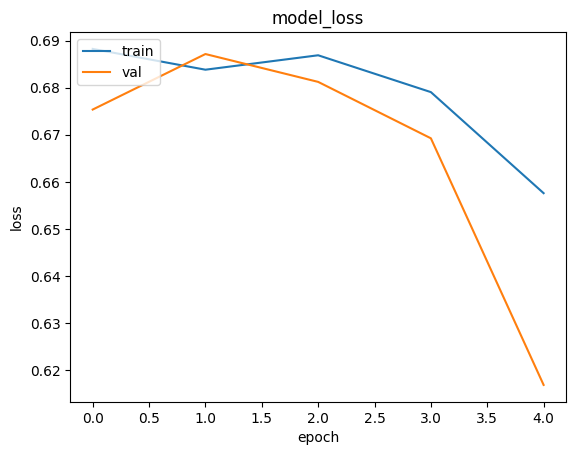

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model_loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

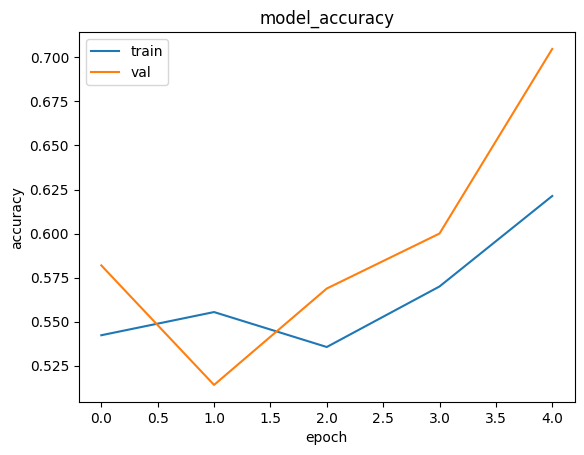

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('model_accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
test_dataset=test_ds.map(vectorizer)
test_dataset=test_dataset.batch(BATCH_SIZE)
model.evaluate(train_dataset)

391/391 ━━━━━━━━━━━━━━━━━━━━ 7s 19ms/step - accuracy: 0.7035 - loss: 0.6180


[0.617872953414917, 0.7015200257301331]

  BIDIRECTIONAL LSTM

In [ ]:
EMBEDDING_DIM=64
model=tf.keras.models.Sequential([
    Input(shape=(SEQUENCE_LENGTH,)),
    Embedding(VOCAB_SIZE,EMBEDDING_DIM),

    Bidirectional(LSTM(64,return_sequences=True)),
    Bidirectional(LSTM(32)),

    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(1,activation='sigmoid'),
])
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)              │ (None, 250, 64)             │         640,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional (Bidirectional)        │ (None, 250, 128)            │          66,048 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_1 (Bidirectional)      │ (None, 64)                  │          41,216 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 751,489 (2.87 MB)

 Trainable params: 751,489 (2.87 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
checkpoint_filepath = 'lstm.h5'
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)

In [ ]:
model.compile(loss='binary_crossentropy',optimizer=Adam(learning_rate=1e-4),metrics=['accuracy']) # Changed optimizer to Adam(learning_rate=1e-4)

In [ ]:
history=model.fit(train_dataset,validation_data=val_dataset,epochs=10,callbacks=[model_checkpoint_callback])

Epoch 1/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 0s 353ms/step - accuracy: 0.5372 - loss: 0.6840

391/391 ━━━━━━━━━━━━━━━━━━━━ 163s 405ms/step - accuracy: 0.5374 - loss: 0.6838 - val_accuracy: 0.8306 - val_loss: 0.4141
Epoch 2/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 0s 353ms/step - accuracy: 0.8418 - loss: 0.3884

391/391 ━━━━━━━━━━━━━━━━━━━━ 159s 406ms/step - accuracy: 0.8419 - loss: 0.3883 - val_accuracy: 0.9042 - val_loss: 0.2563
Epoch 3/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 0s 354ms/step - accuracy: 0.9031 - loss: 0.2648

391/391 ━━━━━━━━━━━━━━━━━━━━ 202s 405ms/step - accuracy: 0.9031 - loss: 0.2647 - val_accuracy: 0.9314 - val_loss: 0.1986
Epoch 4/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 0s 365ms/step - accuracy: 0.9285 - loss: 0.2133

391/391 ━━━━━━━━━━━━━━━━━━━━ 207s 418ms/step - accuracy: 0.9285 - loss: 0.2133 - val_accuracy: 0.9468 - val_loss: 0.1652
Epoch 5/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 198s 408ms/step - accuracy: 0.9392 - loss: 0.1884 - val_accuracy: 0.9089 - val_loss: 0.2341
Epoch 6/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 201s 407ms/step - accuracy: 0.9372 - loss: 0.1854 - val_accuracy: 0.9311 - val_loss: 0.1854
Epoch 7/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 0s 355ms/step - accuracy: 0.9400 - loss: 0.1747

391/391 ━━━━━━━━━━━━━━━━━━━━ 202s 407ms/step - accuracy: 0.9400 - loss: 0.1747 - val_accuracy: 0.9543 - val_loss: 0.1376
Epoch 8/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 0s 361ms/step - accuracy: 0.9460 - loss: 0.1574

391/391 ━━━━━━━━━━━━━━━━━━━━ 225s 466ms/step - accuracy: 0.9460 - loss: 0.1573 - val_accuracy: 0.9549 - val_loss: 0.1328
Epoch 9/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 0s 357ms/step - accuracy: 0.9562 - loss: 0.1326

391/391 ━━━━━━━━━━━━━━━━━━━━ 160s 409ms/step - accuracy: 0.9562 - loss: 0.1325 - val_accuracy: 0.9556 - val_loss: 0.1262
Epoch 10/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 0s 357ms/step - accuracy: 0.9647 - loss: 0.1123

391/391 ━━━━━━━━━━━━━━━━━━━━ 202s 410ms/step - accuracy: 0.9647 - loss: 0.1123 - val_accuracy: 0.9655 - val_loss: 0.1034


In [ ]:
sample_review = tf.constant(["The movie making quality is excellent, and I am very satisfied with this!"])
vectorized_review = vectorize_layer(sample_review)
#print(vectorized_review.numpy())


In [ ]:
def your_sentiment(review):
  prediction=model.predict(review)
  if prediction[0]>0.5:
    return 'positive'
  else:
    return 'negative'

In [ ]:
your_sentiment(vectorized_review)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 522ms/step


'positive'

In [ ]:
saved_model_path = 'saved_model'
model.save(saved_model_path)

In [ ]:
model.save("sentiment_model.h5")  # Saves the model in HDF5 format


In [ ]:
from tensorflow.keras.models import load_model

model = load_model("sentiment_model.h5")  # If saved as HDF5
# or
#model = load_model("sentiment_model")  # If saved as SavedModel format
